## Load Basic Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random 
from pprint import pprint

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Load the data

In [4]:
data = 'adult.train.10k.discrete'
test = 'adult.test.10k.discrete'
headernames = ['target', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
train_dataset = pd.read_csv(data, names=headernames)
test_dataset = pd.read_csv(test, names=headernames)

In [5]:
train_dataset.head()

,target,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,<=50K,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,<=50K,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [6]:
train_dataset

,target,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,<=50K,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,<=50K,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,<=50K,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,<=50K,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...
9995,>50K,Federal-gov,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
9996,<=50K,Private,Some-college,Married-civ-spouse,Other-service,Wife,Black,Female,United-States
9997,<=50K,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
9998,<=50K,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States


In [7]:
train_dataset.shape

(10000, 9)

In [8]:
train_dataset.dtypes

target            object
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [9]:
train_dataset.isnull().sum()

target            0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [10]:
train_dataset.describe().T

,count,unique,top,freq
target,10000,2,<=50K,7550
workclass,10000,7,Private,7379
education,10000,16,HS-grad,3279
marital-status,10000,7,Married-civ-spouse,4651
occupation,10000,14,Prof-specialty,1327
relationship,10000,6,Husband,4104
race,10000,5,White,8602
sex,10000,2,Male,6784
native-country,10000,40,United-States,9091


In [11]:
train_dataset.describe().T

,count,unique,top,freq
target,10000,2,<=50K,7550
workclass,10000,7,Private,7379
education,10000,16,HS-grad,3279
marital-status,10000,7,Married-civ-spouse,4651
occupation,10000,14,Prof-specialty,1327
relationship,10000,6,Husband,4104
race,10000,5,White,8602
sex,10000,2,Male,6784
native-country,10000,40,United-States,9091


In [13]:
train_dataset['target'].value_counts()

<=50K    7550
>50K     2450
Name: target, dtype: int64

In [14]:
train_dataset['workclass'].value_counts()

 Private             7379
 Self-emp-not-inc     853
 Local-gov            681
 State-gov            434
 Self-emp-inc         358
 Federal-gov          293
 Without-pay            2
Name: workclass, dtype: int64

In [16]:
train_dataset['education'].value_counts()

 HS-grad         3279
 Some-college    2271
 Bachelors       1672
 Masters          541
 Assoc-voc        412
 11th             338
 Assoc-acdm       321
 10th             278
 7th-8th          188
 Prof-school      182
 9th              155
 Doctorate        110
 12th             107
 5th-6th           86
 1st-4th           47
 Preschool         13
Name: education, dtype: int64

In [17]:
train_dataset['marital-status'].value_counts()

 Married-civ-spouse       4651
 Never-married            3223
 Divorced                 1414
 Separated                 326
 Widowed                   256
 Married-spouse-absent     124
 Married-AF-spouse           6
Name: marital-status, dtype: int64

In [18]:
train_dataset['occupation'].value_counts()

 Prof-specialty       1327
 Exec-managerial      1289
 Craft-repair         1279
 Adm-clerical         1274
 Sales                1241
 Other-service        1087
 Machine-op-inspct     660
 Transport-moving      537
 Handlers-cleaners     428
 Farming-fishing       317
 Tech-support          296
 Protective-serv       218
 Priv-house-serv        45
 Armed-Forces            2
Name: occupation, dtype: int64

In [19]:
train_dataset['relationship'].value_counts()

 Husband           4104
 Not-in-family     2600
 Own-child         1463
 Unmarried         1061
 Wife               487
 Other-relative     285
Name: relationship, dtype: int64

In [20]:
train_dataset['race'].value_counts()

 White                 8602
 Black                  933
 Asian-Pac-Islander     296
 Amer-Indian-Eskimo      98
 Other                   71
Name: race, dtype: int64

In [21]:
train_dataset['sex'].value_counts()

 Male      6784
 Female    3216
Name: sex, dtype: int64

In [22]:
train_dataset['native-country'].value_counts()

 United-States                 9091
 Mexico                         210
 Philippines                     55
 Germany                         45
 Canada                          44
 Puerto-Rico                     43
 Cuba                            32
 India                           31
 Jamaica                         31
 El-Salvador                     30
 England                         30
 South                           28
 China                           28
 Vietnam                         24
 Dominican-Republic              24
 Iran                            22
 Poland                          21
 Italy                           21
 Guatemala                       20
 Japan                           19
 Greece                          18
 Taiwan                          17
 Haiti                           14
 Portugal                        11
 Columbia                        10
 Peru                             9
 Nicaragua                        9
 Ecuador                    

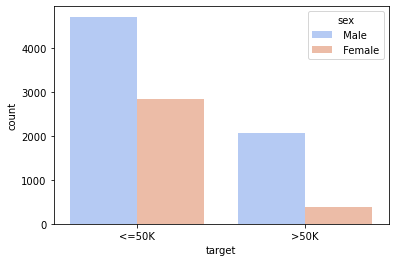

In [24]:
sns.countplot(train_dataset['target'], palette='coolwarm', hue='sex', data=train_dataset);

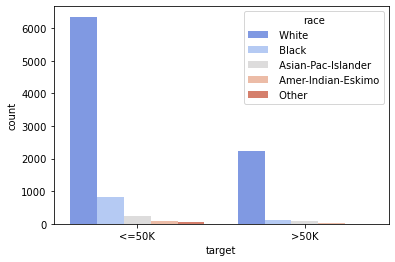

In [25]:
sns.countplot(train_dataset['target'], palette='coolwarm', hue='race', data=train_dataset);

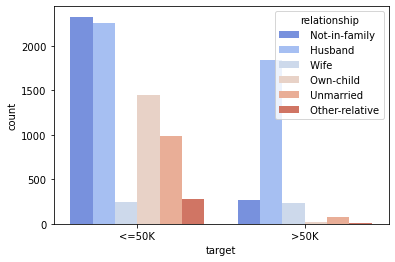

In [26]:
sns.countplot(train_dataset['target'], palette='coolwarm', hue='relationship', data=train_dataset);